In [1]:
import pandas as pd
dataset = pd.read_csv("Placement.csv")
dataset

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [186]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [187]:
dataset.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


# 1) Replace the NaN values with correct value. And justify why you have chosen the same.


In [188]:
dataset.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [2]:
dataset["salary"].fillna(0,inplace=True)

In [190]:
dataset.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

Answer:
He i have replaced the salary column with 0 because it won't be good to go with mean, median, mode values for a candidate who is not placed

# 2) How many of them are not placed?

In [191]:
dataset[dataset["status"]=="Not Placed"]["status"].count()

67

# 3) Find the reason for non placement from the dataset?

In [192]:
dataset["status"].value_counts()

Placed        148
Not Placed     67
Name: status, dtype: int64

Anova Test:

In [12]:
from scipy import stats

ssc_p_placed = dataset[dataset["status"]=="Not Placed"]["ssc_p"]
ssc_p_notplaced = dataset[dataset["status"]=="Placed"]["ssc_p"]

print(stats.f_oneway(ssc_p_placed,ssc_p_notplaced))


hsc_p_placed = dataset[dataset["status"]=="Not Placed"]["hsc_p"]
hsc_p_notplaced = dataset[dataset["status"]=="Placed"]["hsc_p"]

print(stats.f_oneway(hsc_p_placed,hsc_p_notplaced))

degree_p_placed = dataset[dataset["status"]=="Not Placed"]["degree_p"]
degree_p_notplaced = dataset[dataset["status"]=="Placed"]["degree_p"]

print(stats.f_oneway(degree_p_placed,degree_p_notplaced))

etest_p_placed = dataset[dataset["status"]=="Not Placed"]["etest_p"]
etest_p_notplaced = dataset[dataset["status"]=="Placed"]["etest_p"]

print(stats.f_oneway(etest_p_placed,etest_p_notplaced))

mba_p_placed = dataset[dataset["status"]=="Not Placed"]["mba_p"]
mba_p_notplaced = dataset[dataset["status"]=="Placed"]["mba_p"]

F_onewayResult(statistic=124.84250634372715, pvalue=4.115201043884882e-23)
F_onewayResult(statistic=67.74518757489524, pvalue=1.8492127569315302e-14)
F_onewayResult(statistic=63.71917613798709, pvalue=8.807682138862259e-14)
F_onewayResult(statistic=3.5276269558503235, pvalue=0.061720381110172244)


From one way anova i could see the ssc_p feature is more significant and has high impact on Placed and Not Placed Students

# 4) What kind of relation between salary and mba_p


In [194]:
dataset.corr()

C:\Users\Vignesh S\AppData\Local\Temp\ipykernel_14212\2191645083.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset.corr()


,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
sl_no,1.000000,-0.078155,-0.085711,-0.088281,0.063636,0.022327,0.002543
ssc_p,-0.078155,1.000000,0.511472,0.538404,0.261993,0.388478,0.538090
hsc_p,-0.085711,0.511472,1.000000,0.434206,0.245113,0.354823,0.452569
degree_p,-0.088281,0.538404,0.434206,1.000000,0.224470,0.402364,0.408371
etest_p,0.063636,0.261993,0.245113,0.224470,1.000000,0.218055,0.186988
mba_p,0.022327,0.388478,0.354823,0.402364,0.218055,1.000000,0.139823
salary,0.002543,0.538090,0.452569,0.408371,0.186988,0.139823,1.000000


Answer: From the correlation analysis i found that relation between salary and mba_p is 0.139823 which indicates it has positive relationship, that is when mba_p increases then salary also increases however, the relationship is not much strong seems to be a weaker relation.

# 5) Which specialization is getting minimum salary?

In [195]:
data = dataset.groupby("specialisation")

data.salary.mean()

specialisation
Mkt&Fin    236591.666667
Mkt&HR     150842.105263
Name: salary, dtype: float64

Answer: from this i could see Mkt&HR is getting least salary compared to rest of the Specialisations.

# 6) How many of them getting above 500000 salary?


In [196]:
dataset[dataset["salary"]>500000].salary.count()

3

Answer: Three People were getting salary higher than 500000

# 7) Test the Analysis of Variance between etest_p and mba_p at significance level 5%.(Make decision using Hypothesis Testing)


In [18]:
etest_others = dataset[dataset["hsc_b"]=="Others"]["etest_p"]
etest_central = dataset[dataset["hsc_b"]=="Central"]["etest_p"]

mba_others = dataset[dataset["hsc_b"]=="Others"]["mba_p"]
mba_central = dataset[dataset["hsc_b"]=="Central"]["mba_p"]

print("Analysis of variance between people who studied in central board, other board and their influence in entrance test scores:\n ",stats.f_oneway(etest_others,etest_central),"\n")
print("Analysis of variance between people who studied in central board, other board and their influence in mba test scores:\n ",stats.f_oneway(mba_others,mba_central),"\n")

Analysis of variance between people who studied in central board, other board and their influence in entrance test scores:
  F_onewayResult(statistic=0.32626933919938245, pvalue=0.5684663270891429) 

Analysis of variance between people who studied in central board, other board and their influence in mba test scores:
  F_onewayResult(statistic=1.7472426442158298, pvalue=0.18764161303984514) 



Both the anova test has lesser significance value, which indicates there is no significant difference between both the groups under test.

# 8) Test the similarity between the degree_t(Sci&Tech) and specialisation(Mkt&HR) with respect to salary at significance level of 5%.(Make decision using Hypothesis Testing)


In [197]:
dataset.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [198]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [199]:
dataset["Sci_Tech"] = (dataset["degree_t"]=="Sci&Tech").astype(int)
dataset["Mkt_Hr"] = (dataset["specialisation"]=="Mkt&HR").astype(int)

#print(Sci_Tech.count()) #59
#print(Mkt_Hr.count()) #95


model = ols('salary~C(Sci_Tech):C(Mkt_Hr)',dataset).fit()

In [200]:
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(Sci_Tech):C(Mkt_Hr),3.0,4.420656e+11,1.473552e+11,6.636827,0.000264
Residual,211.0,4.684761e+12,2.220266e+10,NaN,NaN


Answer: From two way anova, i can see the similarity between the degree_t(Sci&Tech) and specialisation(Mkt&HR) with respect to salary is at 0.002%. It indicates there is a strong significance hence rejecting null hypothesis and accepting alternate hypothesis.

# 9) Convert the normal distribution to standard normal distribution for salary column


<Axes: xlabel='salary', ylabel='Count'>

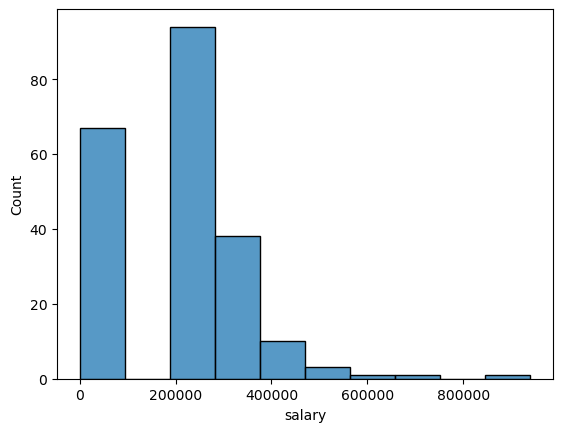

In [201]:
from matplotlib import pyplot
from seaborn import histplot
histplot(dataset,x="salary")

In [202]:
dataset["salary"].skew()

0.446645631452824

It Appears there is skewness (right skew) in the feature, so i will try to go with various transformation technique (Popular one--> Log Transformation, BoxCox Transformation)

Skewness: 0    0.0
dtype: float64


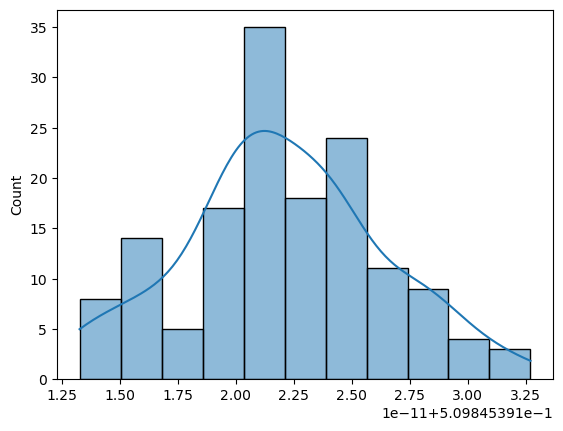

In [203]:
from scipy.stats import boxcox

salary = dataset[dataset["salary"]>0]["salary"]
salary.skew()

standard_salary, lambda_value = boxcox(salary)

histplot(standard_salary,kde=True)
print("Skewness:",pd.DataFrame(standard_salary).skew())

BoxCox Transformation Technique Yielded me zero skewness but the standardized values were constant which cannot be taken to train the model

skewness: 1.7741558074790802


<Axes: xlabel='salary', ylabel='Count'>

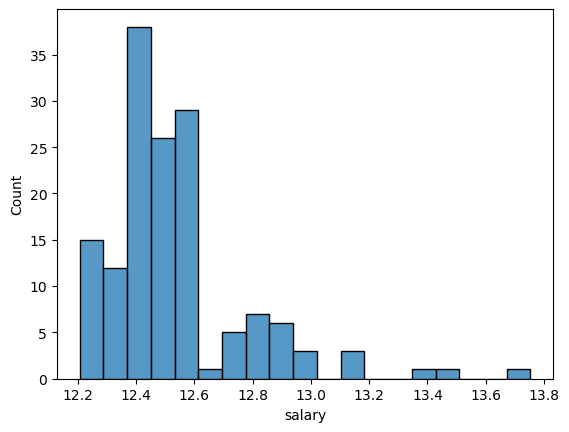

In [204]:
import numpy as np
salary = dataset[dataset["salary"]>0]["salary"]

salary = np.log1p(salary)
print("skewness:",salary.skew())
histplot(salary)

Log Transformation Increased the Skewness. He cannot consider it, its highly right skewed

0    0.446646
dtype: float64


<Axes: ylabel='Count'>

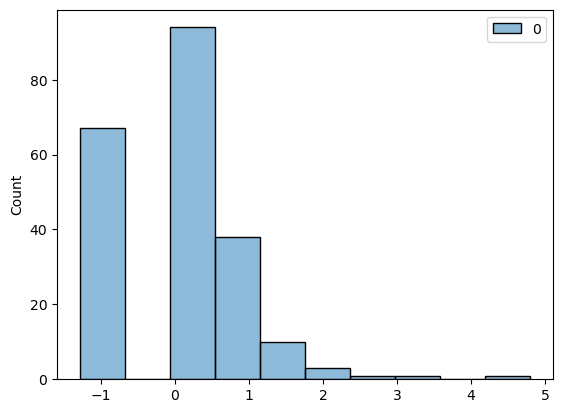

In [205]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
standard_salary = scaler.fit_transform(dataset[["salary"]])
standard_salary = pd.DataFrame(standard_salary)
print(standard_salary.skew())
histplot(standard_salary)

We can now take this standardised data, because skewness is less (Skewness is similar to nonstandardized data)

# 10) What is the probability Density Function of the salary range from 700000 to 900000?

In [176]:
from scipy.stats import norm
mean = dataset["salary"].mean()
std = dataset["salary"].std()

dist = norm(mean,std)

prob = []
for value in range(700000,900000):
    prob.append(dist.pdf(value))


In [177]:
sum(prob)

0.0005973310593974901

The Probability density function for salary range from 700000 to 9000000 to 0.005%

# 11) Test the similarity between the degree_t(Sci&Tech)with respect to etest_p and mba_p at significance level of 5%.(Make decision using Hypothesis Testing)


In [212]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

dataset["sci_tech"] = (dataset["degree_t"]=="Sci&Tech").astype(int) # Here i have taken out the Sci&Tech group out from the degree_t and converted it as the separate binary column
#print(sci_tech)

sci_tech_etest = ols("etest_p~C(sci_tech)",dataset).fit()

sci_tech_mba_p = ols("mba_p~C(sci_tech)",dataset).fit()

print(anova_lm(sci_tech_etest))
print(anova_lm(sci_tech_mba_p))

                df        sum_sq     mean_sq         F    PR(>F)
C(sci_tech)    1.0      3.584256    3.584256  0.020243  0.886995
Residual     213.0  37714.133677  177.061660       NaN       NaN
                df       sum_sq     mean_sq         F    PR(>F)
C(sci_tech)    1.0   113.798268  113.798268  3.381432  0.067327
Residual     213.0  7168.274125   33.653869       NaN       NaN


from the above anova analysis i can see that sci_tech degree has low significance on etest_p, hence null hypothesis is accepted. Similarly for mba_p has high significance with degree_t (sci&Tech), hence null hypothesis is rejected.

# 12) Which parameter is highly correlated with salary?


In [215]:
dataset.corr()

C:\Users\Vignesh S\AppData\Local\Temp\ipykernel_14212\2191645083.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset.corr()


,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,Sci_Tech,Mkt_Hr,sci_tech
sl_no,1.000000,-0.078155,-0.085711,-0.088281,0.063636,0.022327,0.002543,0.009069,0.046630,0.009069
ssc_p,-0.078155,1.000000,0.511472,0.538404,0.261993,0.388478,0.538090,0.221235,-0.172536,0.221235
hsc_p,-0.085711,0.511472,1.000000,0.434206,0.245113,0.354823,0.452569,-0.053599,-0.241630,-0.053599
degree_p,-0.088281,0.538404,0.434206,1.000000,0.224470,0.402364,0.408371,0.123477,-0.218286,0.123477
etest_p,0.063636,0.261993,0.245113,0.224470,1.000000,0.218055,0.186988,0.009748,-0.236315,0.009748
mba_p,0.022327,0.388478,0.354823,0.402364,0.218055,1.000000,0.139823,0.125009,-0.105728,0.125009
salary,0.002543,0.538090,0.452569,0.408371,0.186988,0.139823,1.000000,0.079351,-0.275766,0.079351
Sci_Tech,0.009069,0.221235,-0.053599,0.123477,0.009748,0.125009,0.079351,1.000000,0.061503,1.000000
Mkt_Hr,0.046630,-0.172536,-0.241630,-0.218286,-0.236315,-0.105728,-0.275766,0.061503,1.000000,0.061503
sci_tech,0.009069,0.221235,-0.053599,0.123477,0.009748,0.125009,0.079351,1.000000,0.061503,1.000000


From this above table i can say ssc_p has high correlation with salary

# 13) plot any useful graph and explain it

C:\Users\Vignesh S\AppData\Local\Temp\ipykernel_1132\2371990885.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(), annot=True)


<Axes: >

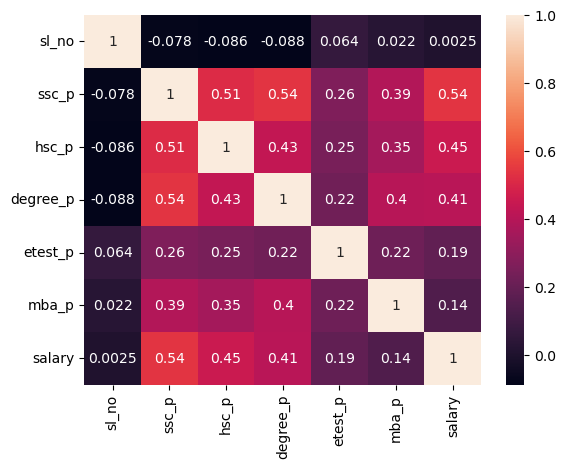

In [30]:
import seaborn as sns

sns.heatmap(dataset.corr(), annot=True)

Here i have plotted the coorelation matrix heatmap, which shows the correlation of different variables in the dataset. Here ssc_p has higher correlation with salary.